In [1]:
from pde import NeuralNet, LinearQuadraticRegulator2D, LinearQuadraticRegulator10D, GenerateData, NonLinear, CuckerSmale
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy

## Analyse experiments

### Linear case

In [70]:
df = pd.read_pickle('experiments/linear/linear.csv')

In [71]:
def computeTypes(config):
    if config['gamma']['residual'] != 0:
        if config['gamma']['data'] != 0:
            return 'data_gradient_residual'
        else:
            return 'residual'
    else:
        if config['gamma']['gradient'] != 0:
            return 'data_gradient'
        else:
            return 'data'

df['type'] = df['config'].apply(computeTypes)
resu = df.groupby('type')['mse'].apply(lambda x: np.median( np.vstack( x.to_numpy() ), axis=0 ) ).to_frame(name='mse_median')

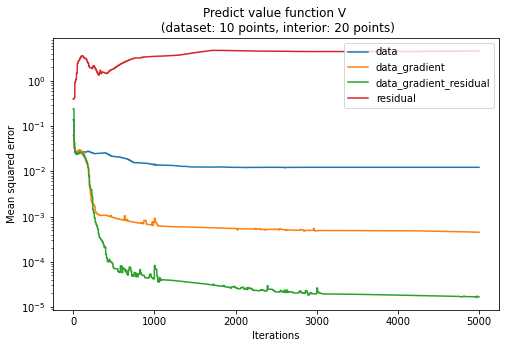

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
for idx, row in resu.iterrows():
    ax.plot(row['mse_median'], label=idx)
ax.set_yscale('log')
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean squared error')
ax.legend(loc='upper right')
ax.set_title('Predict value function V \n (dataset: 10 points, interior: 20 points)');

In [78]:
df = pd.read_pickle('experiments/linear/linear_quadratic.csv')

In [79]:
def computeTypes(config):
    if config['gamma']['residual'] != 0:
        if config['gamma']['data'] != 0:
            return 'data_gradient_residual'
        else:
            return 'residual'
    else:
        if config['gamma']['gradient'] != 0:
            return 'data_gradient'
        else:
            return 'data'

df['type'] = df['config'].apply(computeTypes)
resu = df.groupby('type')['mse'].apply(lambda x: np.median( np.vstack( x.to_numpy() ), axis=0 ) ).to_frame(name='mse_median')

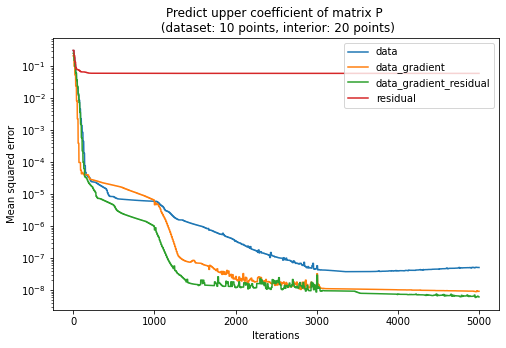

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))
for idx, row in resu.iterrows():
    ax.plot(row['mse_median'], label=idx)
ax.set_yscale('log')
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean squared error')
ax.legend(loc='upper right')
ax.set_title('Predict upper coefficient of matrix P \n (dataset: 10 points, interior: 20 points)' );

### Non linear case

In [100]:
df = pd.read_pickle('experiments/non_linear/non_linear.csv')

In [101]:
def computeTypes(config):
    if config['gamma']['residual'] != 0:
        if config['gamma']['data'] != 0:
            return 'data_gradient_residual'
        else:
            return 'residual'
    else:
        if config['gamma']['gradient'] != 0:
            return 'data_gradient'
        else:
            return 'data'

df['type'] = df['config'].apply(computeTypes)
resu = df.groupby('type')['mse'].apply(lambda x: np.median( np.vstack( x.to_numpy() ), axis=0 ) ).to_frame(name='mse_median')

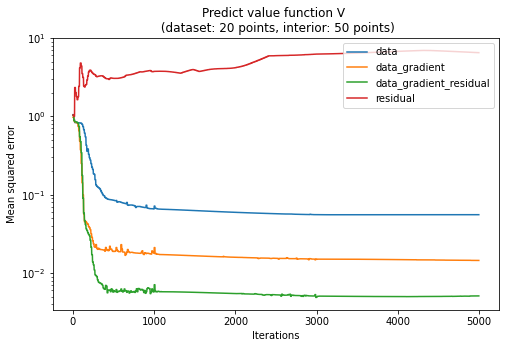

In [103]:
fig, ax = plt.subplots(figsize=(8, 5))
for idx, row in resu.iterrows():
    ax.plot(row['mse_median'], label=idx)
ax.set_yscale('log')
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean squared error')
ax.legend(loc='upper right')
ax.set_title('Predict value function V \n (dataset: 20 points, interior: 50 points)' );

In [104]:
df = pd.read_pickle('experiments/non_linear/non_linear_quadratic.csv')

In [105]:
def computeTypes(config):
    if config['gamma']['residual'] != 0:
        if config['gamma']['data'] != 0:
            return 'data_gradient_residual'
        else:
            return 'residual'
    else:
        if config['gamma']['gradient'] != 0:
            return 'data_gradient'
        else:
            return 'data'

df['type'] = df['config'].apply(computeTypes)
resu = df.groupby('type')['mse'].apply(lambda x: np.median( np.vstack( x.to_numpy() ), axis=0 ) ).to_frame(name='mse_median')

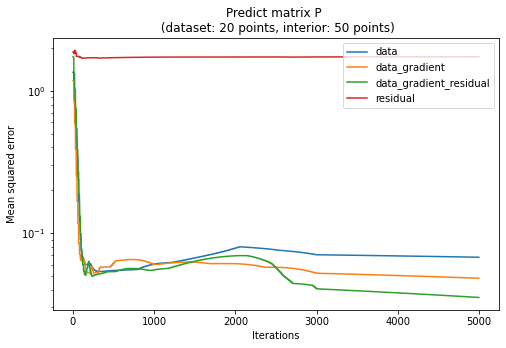

In [106]:
fig, ax = plt.subplots(figsize=(8, 5))
for idx, row in resu.iterrows():
    ax.plot(row['mse_median'], label=idx)
ax.set_yscale('log')
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean squared error')
ax.legend(loc='upper right')
ax.set_title('Predict matrix P \n (dataset: 20 points, interior: 50 points)' );

In [138]:
pde = df.loc[0, 'pde']

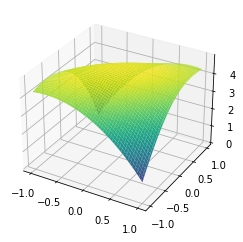

In [139]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)

Z = pde.network.computeValueFunction(pde.getEvaluationPoints()).reshape(-1, 100)
Z0 = Z.min()

Z = Z - Z0

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.detach().numpy(), cmap='viridis');

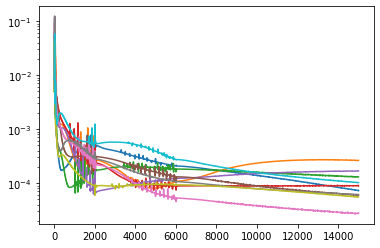

In [158]:
# alternative technique: two steps learning
df = pd.read_pickle('experiments/non_linear/non_linear_two_steps.csv')
two_steps_arr = np.median( np.vstack( df['mse_residual'].apply(lambda x: x.to_numpy()).to_numpy() ), axis=0 )

for i in range(10):
    plt.plot( np.vstack( df['mse_residual'].apply(lambda x: x.to_numpy()).to_numpy() )[i] )
plt.yscale('log')

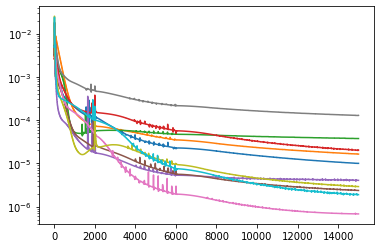

In [159]:
df = pd.read_pickle('experiments/non_linear/non_linear_two_steps_quadratic.csv')
two_steps_quadratic_arr = np.median( np.vstack( df['mse_residual'].apply(lambda x: x.to_numpy()).to_numpy() ), axis=0 )

for i in range(10):
    plt.plot( np.vstack( df['mse_residual'].apply(lambda x: x.to_numpy()).to_numpy() )[i] )
plt.yscale('log')

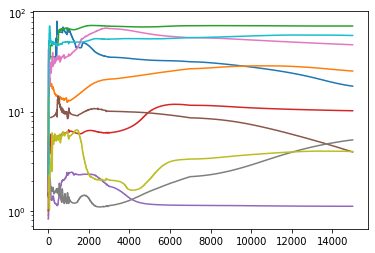

In [162]:
# alternative technique: additional neural net
df = pd.read_pickle('experiments/non_linear/non_linear_additional_nn.csv')
add_nn_arr = np.median( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() ), axis=0 )

for i in range(10):
    plt.plot( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() )[i] )
plt.yscale('log')

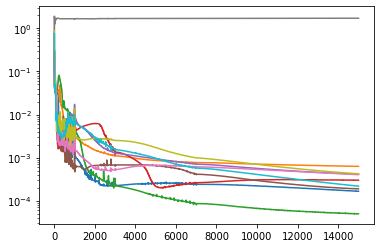

In [161]:
# alternative technique: additional neural net
df = pd.read_pickle('experiments/non_linear/non_linear_additional_nn_quadratic.csv')
add_nn_quadratic_arr = np.median( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() ), axis=0 )

for i in range(10):
    plt.plot( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() )[i] )
plt.yscale('log')

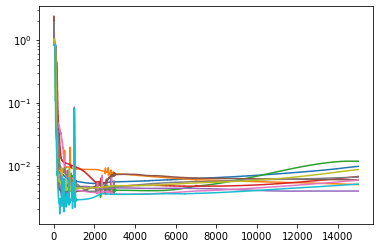

In [164]:
# the normal technique with everything
df = pd.read_pickle('experiments/non_linear/non_linear_data_grad_residual.csv')
total_arr = np.median( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() ), axis=0 )

for i in range(10):
    plt.plot( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() )[i] )
plt.yscale('log')

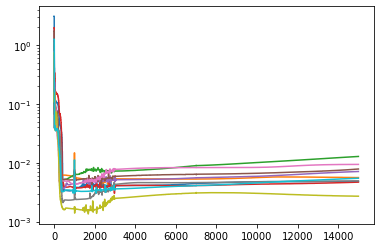

In [167]:
df = pd.read_pickle('experiments/non_linear/non_linear_data_grad_residual_quadratic.csv')
total_quadratic_arr = np.median( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() ), axis=0 )

for i in range(10):
    plt.plot( np.vstack( df['mse'].apply(lambda x: x.to_numpy()).to_numpy() )[i] )
plt.yscale('log')

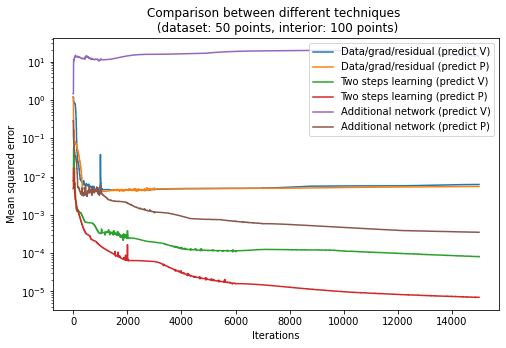

In [169]:
# show the 2x2 cases:
# predict V with 2 steps vs additional nn
# predict P with 2 steps vs additional nn

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot( total_arr, label='Data/grad/residual (predict V)' )
ax.plot( total_quadratic_arr, label='Data/grad/residual (predict P)' )
ax.plot( two_steps_arr, label='Two steps learning (predict V)' )
ax.plot( two_steps_quadratic_arr, label='Two steps learning (predict P)' )
ax.plot( add_nn_arr, label='Additional network (predict V)' )
ax.plot( add_nn_quadratic_arr, label='Additional network (predict P)' )
ax.set_yscale('log')
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean squared error')
ax.set_title('Comparison between different techniques \n (dataset: 50 points, interior: 100 points)')
ax.legend();